# Homework 3

---

__Semester-Long Project:__ We are going to create an automated, real-time, solar wind single-page application (possibly GUI/web) to visualize and analyze data from the DSCOVR observatory.

An example of such a product commercially is here (the top map only which uses an auroral model): [SpaceWeatherLive.com](https://www.spaceweatherlive.com).

---

__Put all of your responses in Markdown and submit the final Jupyter notebook.__ You can download and use this notebook as an example.
1. Using the last homework as a guide, download the most current solar wind data from DISCOVR using Python (do not just download by hand). As a reference, a real-time visualization is here: [http://www.swpc.noaa.gov/products/real-time-solar-wind](http://www.swpc.noaa.gov/products/real-time-solar-wind). Make sure to give your source of where you are finding this data.
2. If we were using this data to warn humans on Earth about geomagnetic events, describe what checks would be placed on the data after it is downloaded.
3. Use matplotlib to plot the latest 7-days plasma density of the solar wind.

# Answers

Question 1. 

We can download the JSON data for the last 7-days which will aid us in solving question #3.

In [1]:
import json
import urllib.request

url = 'http://services.swpc.noaa.gov/products/solar-wind/plasma-7-day.json'
with urllib.request.urlopen(url) as f:
    data = json.loads(f.read().decode())

Question 2.

We would want certain checks in place that will alert us when the plasma density exceeds certain values for geomagnetic storms (i.e., certain outages that would affect satellites or our electronic devices). We also would want to do sanity checks of the data to make sure that the data was downloaded correctly and to entirety.

Question 3.

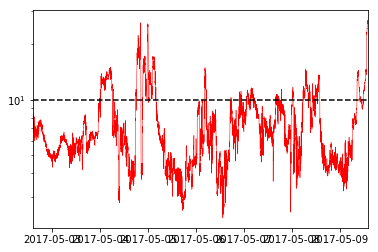

In [2]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# put data in numpy arrays
dates = []
density = []
for entry in data[1:]:
    time, d, speed, temp = entry
    dates.append(dt.datetime.strptime(time, '%Y-%m-%d %H:%M:%S.%f'))
    density.append(d)
dates = np.array(dates)
density = np.array(density)

# plot
plt.plot(dates, density, 'r-', linewidth=0.5)
plt.yscale('log')
plt.xlim(dates[0], dates[-1])
plt.axhline(y=10, color='k', linestyle='--')